## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import seaborn as sns

## Datos

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [3]:
target='median_house_value'

In [4]:
df=housing.copy()

## Primera Exploración

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## EDA

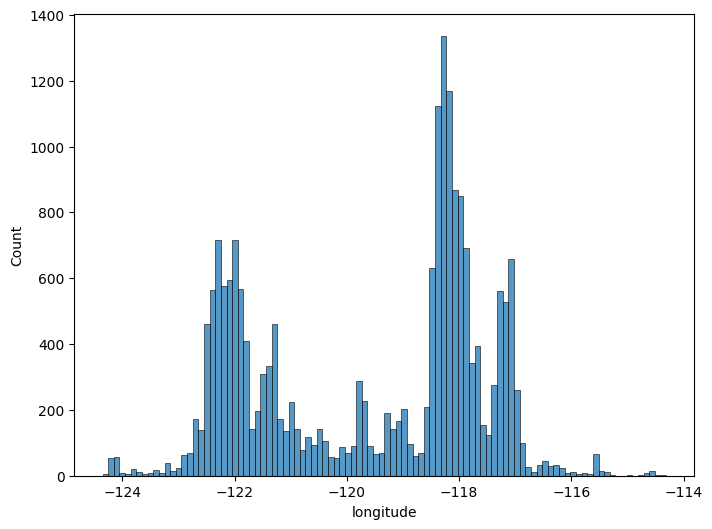

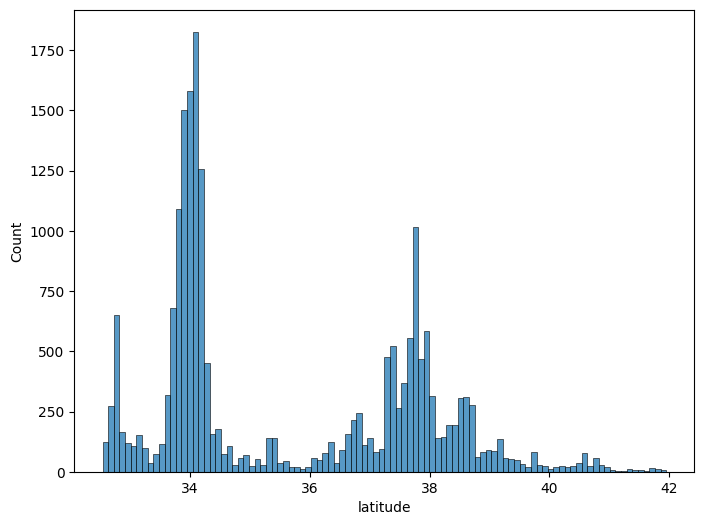

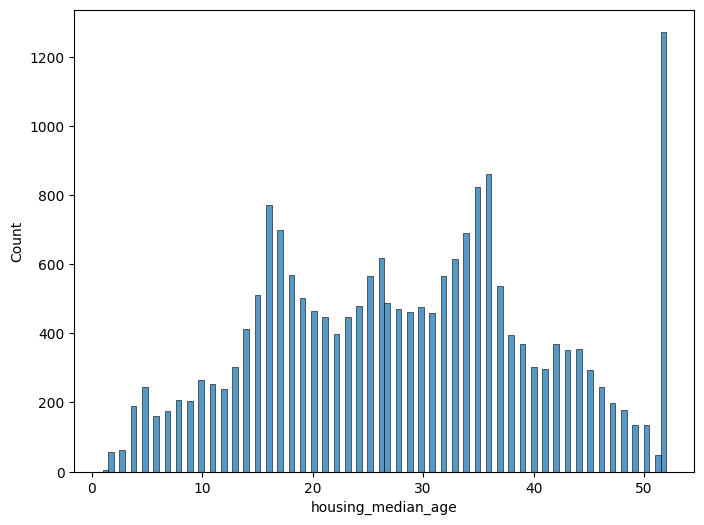

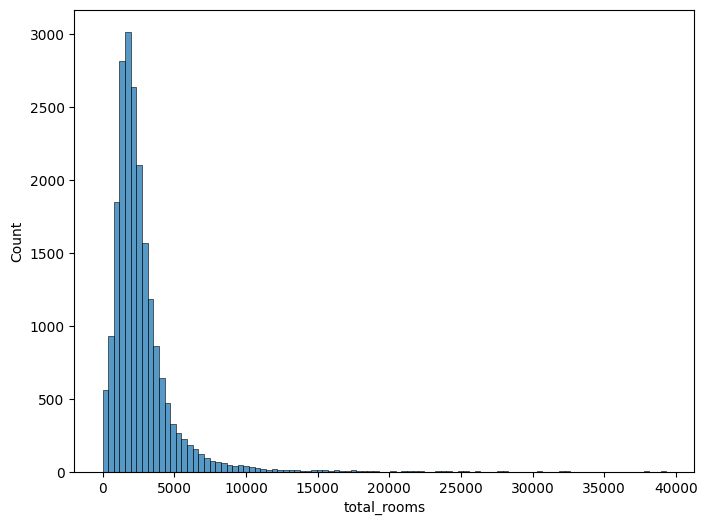

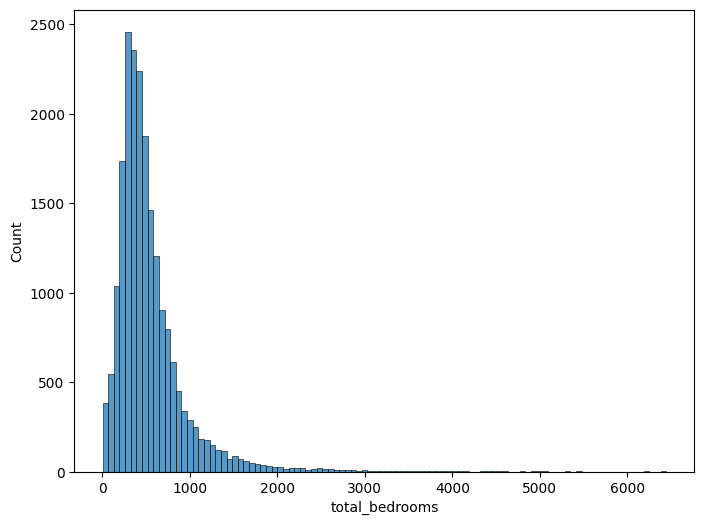

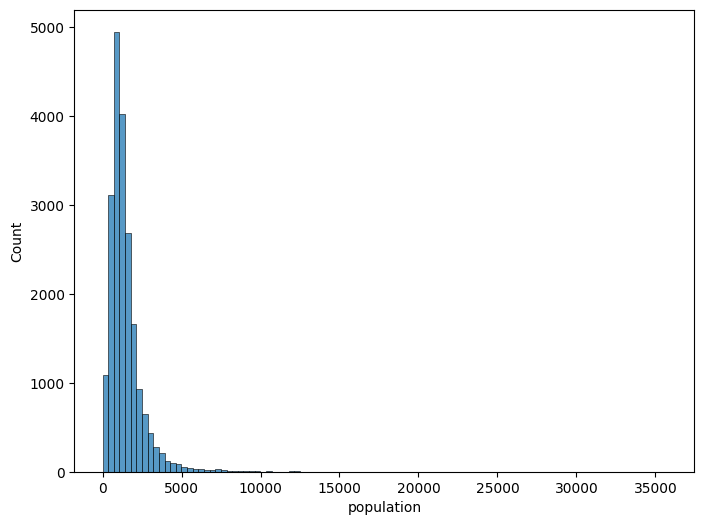

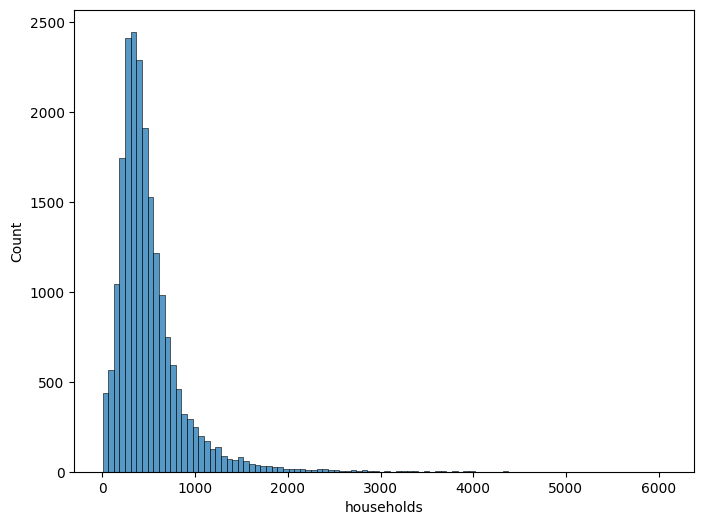

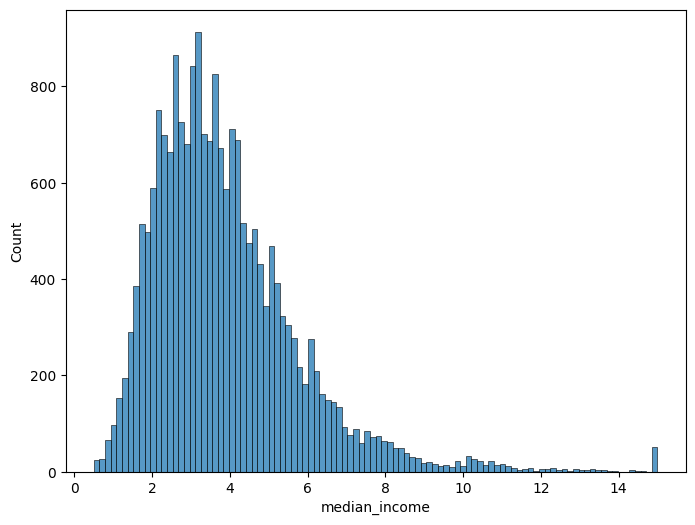

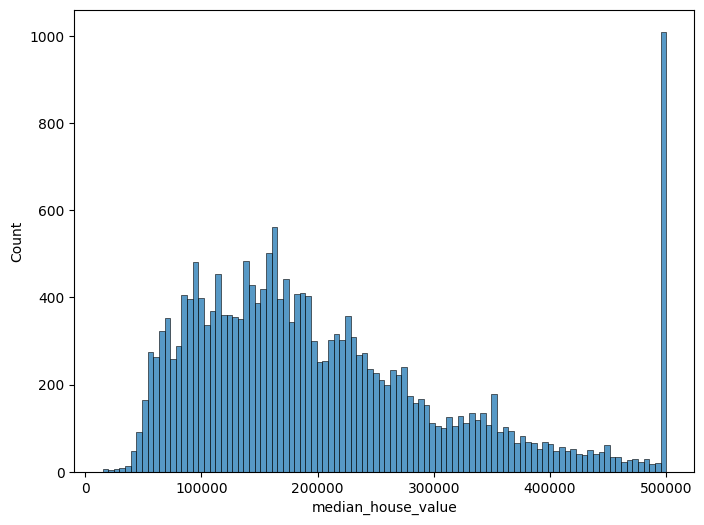

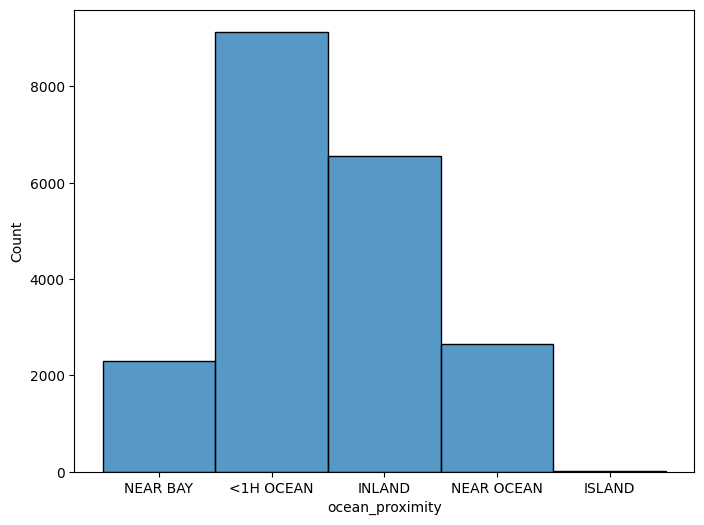

In [10]:
for col in df:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=100)
    plt.show()

<Axes: >

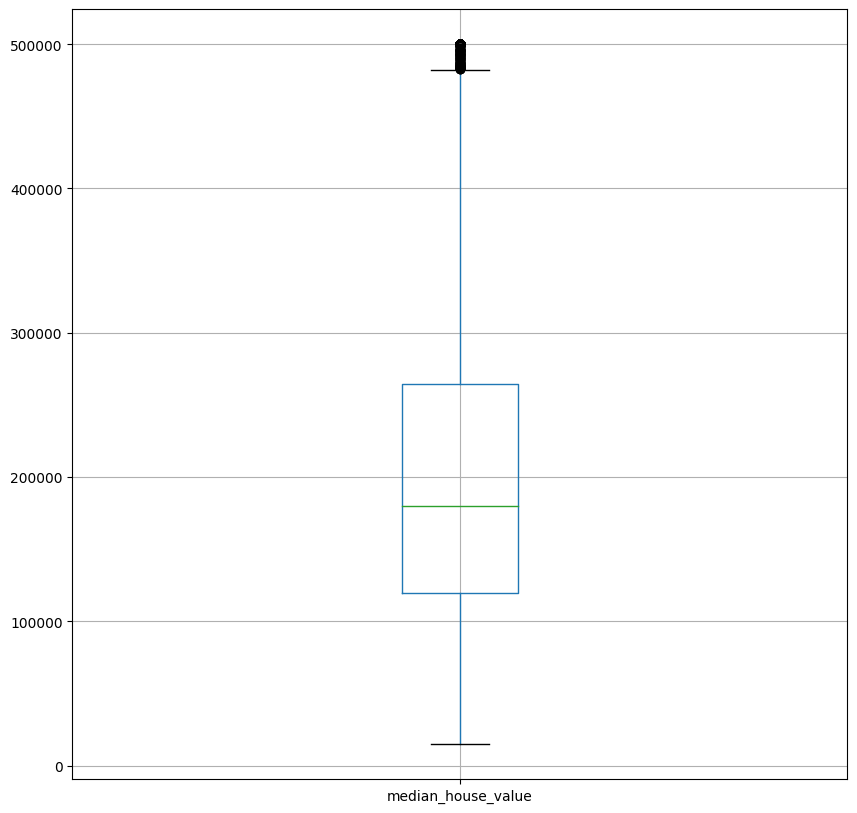

In [11]:
df.boxplot(['median_house_value'], figsize=(10, 10))

C:\Users\0205301\AppData\Local\Temp\ipykernel_23992\4188759307.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

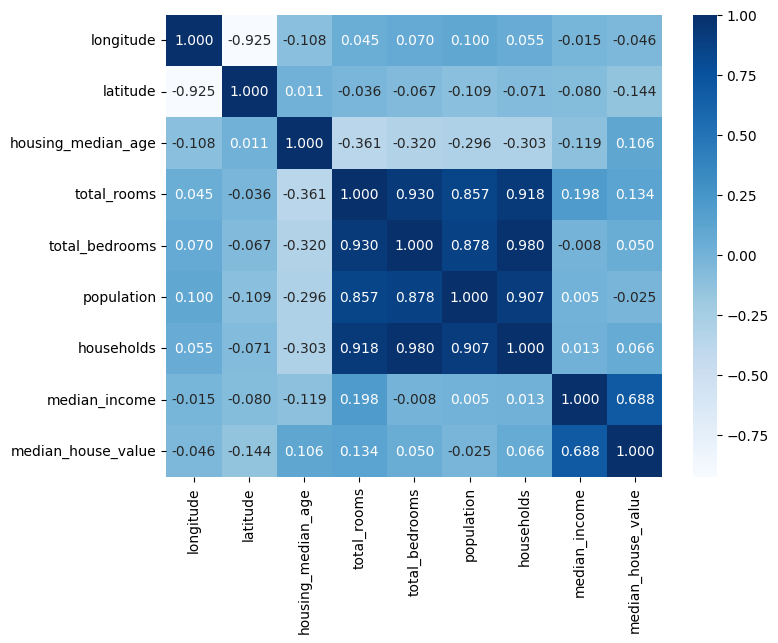

In [12]:
corr = df.corr()

# heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(data=corr, annot=True, fmt='.3f', cmap='Blues')

##Ouliers & misssing Values

In [31]:
df=df.loc[-df['total_bedrooms'].isna()]

### División de los datos 

In [14]:
# train --> train + validation 
# test --> test

In [32]:
X = df.drop(columns=[target])
y = df[target]


In [16]:
# Escalado OHE o LBE

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler

# Funciones de transformación
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp, validate=False)
scaler = StandardScaler()

# Pipeline de transformación
transform_pipeline = Pipeline([
    ('log', log_transformer),
    ('scaler', scaler)
])

# Aplicar el pipeline al conjunto de entrenamiento
y_t = pd.Series(transform_pipeline.fit_transform(y.values.reshape(-1, 1)).ravel(), index=y.index)

C:\Users\0205301\AppData\Local\Temp\ipykernel_23992\4138997882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_t)


<Axes: ylabel='Density'>

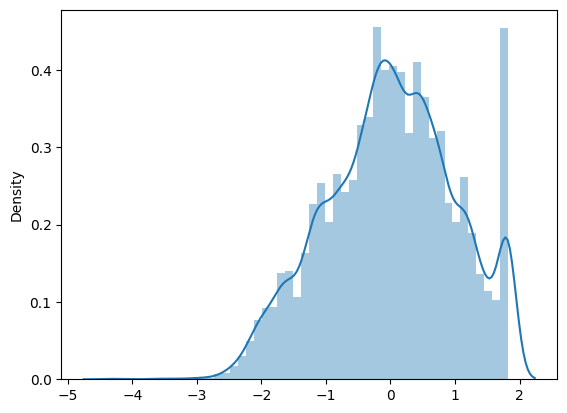

In [18]:
sns.distplot(y_t)

In [19]:
# Crear el pipeline inverso
reverse_transform_pipeline = Pipeline([
    ('inverse_scaler', FunctionTransformer(func=scaler.inverse_transform, validate=False)),
    ('inverse_log', FunctionTransformer(func=np.exp, inverse_func=np.log, validate=False))
])

# Aplicar la transformación inversa
y_original = pd.Series(reverse_transform_pipeline.transform(y_t.values.reshape(-1, 1)).ravel(), index=y.index)



In [34]:
def reverse_transform(u, sIndex=None):
    if sIndex is None:
        sIndex = pd.Series(u)
    else:
        sIndex = pd.Series(u, index=sIndex.index)

    # Check if u is a NumPy array and convert it to a Pandas Series
    if isinstance(u, np.ndarray):
        u = pd.Series(u)

    pdserie = pd.Series(reverse_transform_pipeline.transform(u.values.reshape(-1, 1)).ravel(), index=sIndex.index)
    return pdserie

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Definir las columnas categóricas y numéricas
columnas_categoricas = list(df.select_dtypes(include=['object']).columns)
columnas_numericas =  list(df.select_dtypes(exclude=['object']).columns)
columnas_numericas.remove(target)  # Remove the target column

# Construir el transformador de columnas
transformador_columnas = ColumnTransformer(
    transformers=[
        ('categoricas',  OneHotEncoder(handle_unknown='ignore', drop='first'), columnas_categoricas),
        ('numericas', StandardScaler(), columnas_numericas)
    ])

# Construir el pipeline completo
pipeline = Pipeline([
    ('transformador_columnas', transformador_columnas)
])


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X and y are already defined
# Assuming pipeline and transform_pipeline are already defined

# Split the data into training, validation, and test sets
X_sample, X_test, y_sample, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have a pipeline for feature transformation
X_train_t = pipeline.fit_transform(X_sample)
X_test_t = pipeline.transform(X_test)
y_train_t = pd.Series(transform_pipeline.fit_transform(y_train.values.reshape(-1, 1)).ravel(), index=y_sample.index)
y_test_t = pd.Series(transform_pipeline.transform(y_test.values.reshape(-1, 1)).ravel(), index=y_test.index)

# Further split the training set into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_t, y_train_t, test_size=0.25, random_state=42)

print(X_train.shape, X_val.shape, X_test_t.shape, y_train.shape, y_val.shape, y_test.shape)

(12259, 12) (4087, 12) (4087, 12) (12259,) (4087,) (4087,)


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# Create a linear regression model
model = RandomForestRegressor()

# Perform cross-validation
cv_scores = cross_val_score(model, X_val, y_val, cv=5)  # You can adjust the number of folds (cv parameter)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))



Cross-validation scores: [0.78592604 0.79226284 0.75834575 0.76345515 0.78704232]
Mean CV Score: 0.7774064202427915


In [ ]:
# Tunning o hiperparametros

In [43]:
model.fit(X_train_t,y_train_t)

RandomForestRegressor()

In [46]:
y_pred_t=model.predict(X_test_t)
y_pred=reverse_transform(y_pred_t)
y_test
#get metrics

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)   

2491385418.1650043

Text(0, 0.5, 'y_pred')

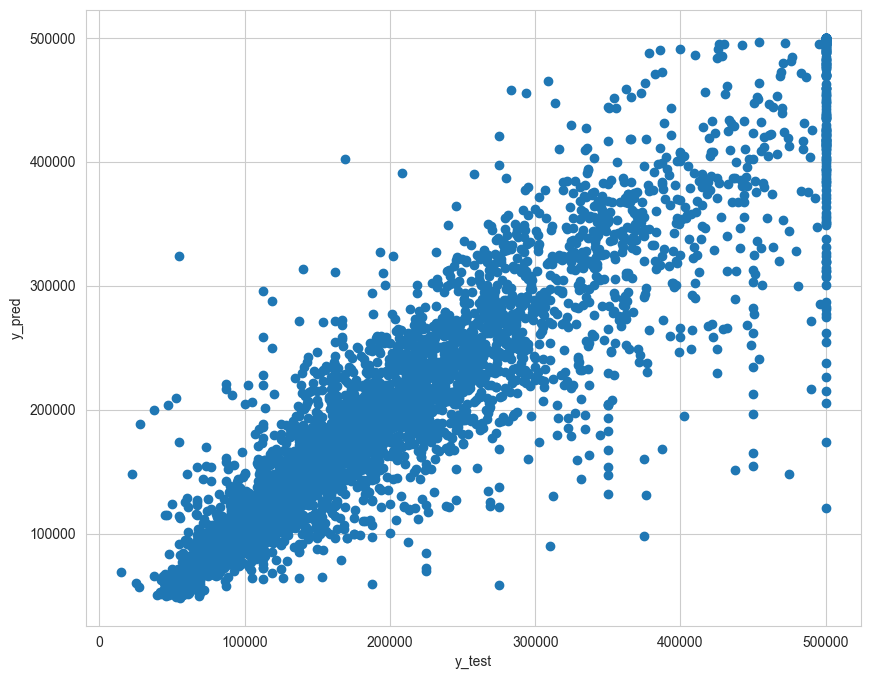

In [49]:
# plot scatter line series y_test  and y_pred:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [ ]:
# Seleccionar Modelos

In [ ]:
##Revertir el escalado

In [ ]:
# Ajuste del Modelo